In [51]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [52]:
#Read in CSV
stats_df = pd.read_csv('seasons_stats.csv')
stats_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [53]:
#Add MVP column
stats_df['MVP'] = "0"

#Drop player stats prior to 1980. Drop rows with Tm as TOT.Drop empty rows
stats_df=stats_df[(stats_df["Year"]>=1980) & (stats_df["Tm"]!="TOT") & (stats_df["Year"]!= "")]

#Drop unnnecessary columns
stats_df=stats_df.drop(columns=['Unnamed: 0', 'blanl', 'blank2'])

#Convert all NaN to zero
stats_df = stats_df.fillna(0)
stats_df['Year'] = stats_df['Year'].astype(int)

In [54]:
#Add MVP winners

#1979-1980 Kareem Abdul-Jabbar
stats_df.at[5727, 'MVP']= 1
#1980-1981 Julius Erving
stats_df.at[6179, 'MVP']= 1
#1981-1982 Moses Malone
stats_df.at[6672, 'MVP']= 1
#1982-1983 Moses Malone
stats_df.at[7045, 'MVP']= 1
#1983-1984 Larry Bird
stats_df.at[7230, 'MVP']= 1
#1984-1985 Larry Bird
stats_df.at[7574, 'MVP']= 1
#1985-1986 Larry Bird
stats_df.at[7940, 'MVP']= 1
#1986-1987 Magic Johnson
stats_df.at[8459, 'MVP']= 1
#1987-1988 Michael Jordan
stats_df.at[8869, 'MVP']= 1
#1988-1989 Magic Johnson
stats_df.at[9283, 'MVP']= 1
#1989-1990 Magic Johnson
stats_df.at[9735, 'MVP']= 1
#1990-1991 Michael Jordan
stats_df.at[10212, 'MVP']= 1
#1991-1992 Michael Jordan
stats_df.at[10666, 'MVP']= 1
#1992-1993 Charles Barkley
stats_df.at[10937, 'MVP']= 1
#1993-1994 Hakeem Olajuwon
stats_df.at[11688, 'MVP']= 1
#1994-1995 David Robinson
stats_df.at[12182, 'MVP']= 1
#1995-1996 Michael Jordan
stats_df.at[12528, 'MVP']= 1
#1996-1997 Karl Malone
stats_df.at[13143, 'MVP']= 1
#1997-1998 Michael Jordan
stats_df.at[13654, 'MVP']= 1
#1998-1999 Karl Malone SHORTENED LOCKOUT SEASON
stats_df.at[14236, 'MVP']= 1
#1999-2000 Shaquille O'Neal
stats_df.at[14806, 'MVP']= 1
#2000-2001 Allen Iverson
stats_df.at[15186, 'MVP']= 1
#2001-2002 Tim Duncan
stats_df.at[15643, 'MVP']= 1
#2002-2003 Tim Duncan
stats_df.at[16129, 'MVP']= 1
#2003-2004 Kevin Garnett
stats_df.at[16674, 'MVP']= 1
#2004-2005 Steve Nash
stats_df.at[17452, 'MVP']= 1
#2005-2006 Steve Nash
stats_df.at[18020, 'MVP']= 1
#2006-2007 Dirk Nowitzki
stats_df.at[18569, 'MVP']= 1
#2007-2008 Kobe Bryant
stats_df.at[18825, 'MVP']= 1
#2008-2009 LeBron James
stats_df.at[19611, 'MVP']= 1
#2009-2010 LeBron James
stats_df.at[20207, 'MVP']= 1
#2010-11 Derrick Rose
stats_df.at[20991, 'MVP']= 1
#2011-2012 Lebron James
stats_df.at[21395, 'MVP']= 1
#2012-2013 LeBron James
stats_df.at[21933, 'MVP']= 1
#2013-2014 Kevin Durant
stats_df.at[22438, 'MVP']= 1
#2014-2015 Stephen Curry
stats_df.at[23000, 'MVP']= 1
#2015-2016 Stephen Curry
stats_df.at[23633, 'MVP']= 1
#2016-2017 Russell Westbrook
stats_df.at[24654, 'MVP']= 1

In [55]:
#Convert MVP column to float type
stats_df["MVP"] = stats_df.MVP.astype(float)
#Remove asterisks from Player names
stats_df["Player"]=stats_df["Player"].replace('\*','',  regex=True).astype(str)
stats_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP
5727,1980,Kareem Abdul-Jabbar,C,32.0,LAL,82.0,0.0,3143.0,25.3,0.639,...,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,1.0
5728,1980,Tom Abernethy,PF,25.0,GSW,67.0,0.0,1222.0,11.0,0.511,...,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0,0.0
5729,1980,Alvan Adams,C,25.0,PHO,75.0,0.0,2168.0,19.2,0.571,...,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0,0.0
5730,1980,Tiny Archibald,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,0.0
5731,1980,Dennis Awtrey,C,31.0,CHI,26.0,0.0,560.0,7.4,0.524,...,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,0.0
24687,2017,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,0.0
24688,2017,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,0.0
24689,2017,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,0.0


In [56]:
#Read in CSV of MVP candidates
candidates_file_df = pd.read_csv('mvp_candidates.csv')
#Create new column by combining Year and Player columns
candidates_file_df['Year_Name'] = candidates_file_df['Year'].astype(str) + candidates_file_df['Player']
candidates_file_df.head()

,Year,Player,Year_Name
0,1980,Kareem Abdul-Jabbar,1980Kareem Abdul-Jabbar
1,1980,Julius Erving,1980Julius Erving
2,1980,George Gervin,1980George Gervin
3,1980,Larry Bird,1980Larry Bird
4,1980,Tiny Archibald,1980Tiny Archibald


In [57]:
#Create new column by combining Year and Player columns
stats_df['Year_Name'] = stats_df['Year'].astype(str) + stats_df['Player']

In [58]:
# Filter out rows based on the Year_Name column
mvp_candidates_df = stats_df[stats_df['Year_Name'].isin(candidates_file_df['Year_Name'])]
mvp_candidates_df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP,Year_Name
5727,1980,Kareem Abdul-Jabbar,C,32.0,LAL,82.0,0.0,3143.0,25.3,0.639,...,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,1.0,1980Kareem Abdul-Jabbar
5730,1980,Tiny Archibald,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,0.0,1980Tiny Archibald
5748,1980,Larry Bird,PF,23.0,BOS,82.0,82.0,2955.0,20.5,0.538,...,636.0,852.0,370.0,143.0,53.0,263.0,279.0,1745.0,0.0,1980Larry Bird
5831,1980,Julius Erving,SF,29.0,PHI,78.0,0.0,2812.0,25.4,0.568,...,361.0,576.0,355.0,170.0,140.0,284.0,208.0,2100.0,0.0,1980Julius Erving
5848,1980,George Gervin,SG,27.0,SAS,78.0,0.0,2934.0,24.0,0.587,...,249.0,403.0,202.0,110.0,79.0,254.0,208.0,2585.0,0.0,1980George Gervin


In [59]:
#Drop columns we identified as not being relevent
mvp_candidates_df=mvp_candidates_df.drop(columns=['Year', 'Year_Name', 'Pos','Tm',"Player"])
mvp_candidates_df

,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP
5727,32.0,82.0,0.0,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,...,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,1.0
5730,31.0,80.0,80.0,2864.0,15.3,0.574,0.023,0.548,2.3,5.3,...,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,0.0
5748,23.0,82.0,82.0,2955.0,20.5,0.538,0.098,0.246,8.3,23.6,...,216.0,636.0,852.0,370.0,143.0,53.0,263.0,279.0,1745.0,0.0
5831,29.0,78.0,0.0,2812.0,25.4,0.568,0.012,0.331,8.6,12.9,...,215.0,361.0,576.0,355.0,170.0,140.0,284.0,208.0,2100.0,0.0
5848,27.0,78.0,0.0,2934.0,24.0,0.587,0.053,0.306,5.7,8.9,...,154.0,249.0,403.0,202.0,110.0,79.0,254.0,208.0,2585.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24365,32.0,74.0,74.0,2794.0,27.0,0.619,0.254,0.395,4.0,20.7,...,97.0,543.0,640.0,646.0,92.0,44.0,303.0,134.0,1954.0,0.0
24414,25.0,74.0,74.0,2474.0,27.5,0.611,0.294,0.407,3.7,15.7,...,80.0,350.0,430.0,260.0,132.0,55.0,154.0,122.0,1888.0,0.0
24612,27.0,76.0,76.0,2569.0,26.5,0.625,0.439,0.441,1.9,7.0,...,43.0,162.0,205.0,449.0,70.0,13.0,210.0,167.0,2199.0,0.0
24646,26.0,78.0,78.0,2836.0,23.2,0.541,0.190,0.367,2.3,10.6,...,58.0,268.0,326.0,831.0,157.0,49.0,323.0,151.0,1805.0,0.0


In [60]:
mvp_candidates_df.dtypes

Age      float64
G        float64
GS       float64
MP       float64
PER      float64
TS%      float64
3PAr     float64
FTr      float64
ORB%     float64
DRB%     float64
TRB%     float64
AST%     float64
STL%     float64
BLK%     float64
TOV%     float64
USG%     float64
OWS      float64
DWS      float64
WS       float64
WS/48    float64
OBPM     float64
DBPM     float64
BPM      float64
VORP     float64
FG       float64
FGA      float64
FG%      float64
3P       float64
3PA      float64
3P%      float64
2P       float64
2PA      float64
2P%      float64
eFG%     float64
FT       float64
FTA      float64
FT%      float64
ORB      float64
DRB      float64
TRB      float64
AST      float64
STL      float64
BLK      float64
TOV      float64
PF       float64
PTS      float64
MVP      float64
dtype: object

# Run Logistic regression model with more features

In [61]:
# Separate the y variable, the labels
y = mvp_candidates_df["MVP"]
# Separate the X variable, the features
X = mvp_candidates_df.drop(columns=["MVP"])
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [62]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [63]:
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [64]:
testing_predictions = lr_model.predict(X_test)
testing_predictions

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, testing_predictions)

0.6760710553814002

Text(69.0, 0.5, 'Truth')

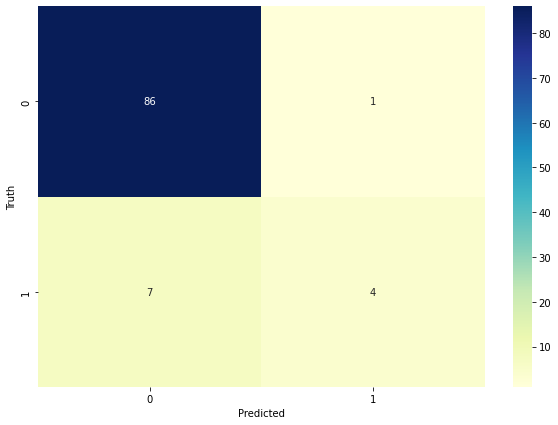

In [67]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=testing_predictions)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Use RandomForestClassifier to figure out most impactful features

Text(0.5, 1.0, 'Random Forest')

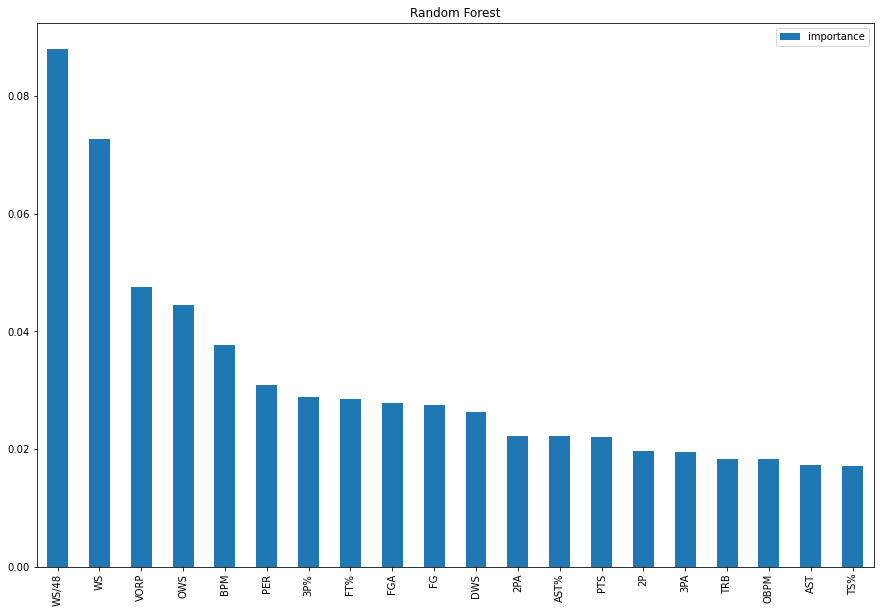

In [68]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X,y)
importance = pd.DataFrame(rf.feature_importances_,index=X.columns.tolist(),columns=['importance']).sort_values(by='importance',ascending=False)
importance.head(20).plot(kind='bar',figsize = (15,10))
plt.title("Random Forest")

In [69]:
important_features = importance.index

## Use top features for Logistic Regression

In [70]:
top_15_features = important_features[:15]

In [71]:
top_15_features

Index(['WS/48', 'WS', 'VORP', 'OWS', 'BPM', 'PER', '3P%', 'FT%', 'FGA', 'FG',
       'DWS', '2PA', 'AST%', 'PTS', '2P'],
      dtype='object')

In [72]:
# Separate the y variable, the labels
y = mvp_candidates_df["MVP"]
# Separate the X variable, the features
X = mvp_candidates_df[top_15_features]
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [73]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [74]:
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

In [75]:
testing_predictions = lr_model.predict(X_test)
testing_predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.])

In [76]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, testing_predictions)

0.6191222570532915

Text(69.0, 0.5, 'Truth')

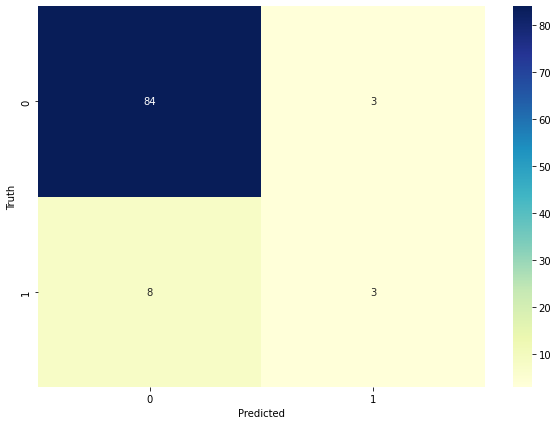

In [77]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=testing_predictions)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Neural Network

In [78]:
# Separate the y variable, the labels
y = mvp_candidates_df["MVP"]
# Separate the X variable, the features
X = mvp_candidates_df.drop(columns=["MVP"])
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [79]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [80]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

46

In [81]:
# Define the number of neurons in the output layer
number_output_neurons = 1
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  20

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

20

In [82]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  10

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

10

In [83]:
# Create the Sequential model instance
nn = Sequential()
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))
# Display the Sequential model summary
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                940       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [85]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
10/10 [==============================] - 0s 651us/step - loss: 0.6580 - accuracy: 0.5616
Epoch 2/50
10/10 [==============================] - 0s 554us/step - loss: 0.5158 - accuracy: 0.7945
Epoch 3/50
10/10 [==============================] - 0s 554us/step - loss: 0.4246 - accuracy: 0.8664
Epoch 4/50
10/10 [==============================] - 0s 554us/step - loss: 0.3658 - accuracy: 0.9041
Epoch 5/50
10/10 [==============================] - 0s 665us/step - loss: 0.3234 - accuracy: 0.9110
Epoch 6/50
10/10 [==============================] - 0s 554us/step - loss: 0.2972 - accuracy: 0.9075
Epoch 7/50
10/10 [==============================] - 0s 665us/step - loss: 0.2796 - accuracy: 0.9110
Epoch 8/50
10/10 [==============================] - 0s 554us/step - loss: 0.2661 - accuracy: 0.9075
Epoch 9/50
10/10 [==============================] - 0s 443us/step - loss: 0.2564 - accuracy: 0.9075
Epoch 10/50
10/10 [==============================] - 0s 665us/step - loss: 0.2476 - accuracy: 0.9075

In [86]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 0.2111 - accuracy: 0.8776 - 63ms/epoch - 16ms/step
Loss: 0.2111283838748932, Accuracy: 0.8775510191917419


In [87]:
yp = nn.predict(X_test_scaled)
yp[:5]

array([[0.01724732],
       [0.00154248],
       [0.01105469],
       [0.68692535],
       [0.00075269]], dtype=float32)

In [88]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [89]:
y_pred[:10]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

Text(69.0, 0.5, 'Truth')

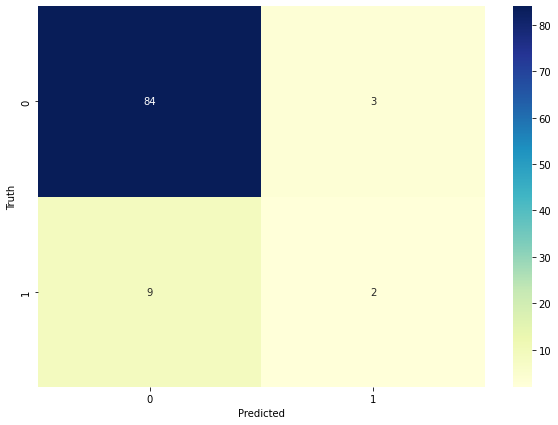

In [90]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Try Nueral Network on top 15 features

In [91]:
# Separate the y variable, the labels
y = mvp_candidates_df["MVP"]
# Separate the X variable, the features
X = mvp_candidates_df[top_15_features]
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [92]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [93]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

15

In [94]:
# Define the number of neurons in the output layer
number_output_neurons = 1
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  7

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

7

In [95]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  4

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

4

In [96]:
# Create the Sequential model instance
nn = Sequential()
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))
# Display the Sequential model summary
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 7)                 112       
                                                                 
 dense_10 (Dense)            (None, 4)                 32        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 149
Trainable params: 149
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [98]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
10/10 [==============================] - 0s 665us/step - loss: 0.6203 - accuracy: 0.8459
Epoch 2/50
10/10 [==============================] - 0s 554us/step - loss: 0.5982 - accuracy: 0.9007
Epoch 3/50
10/10 [==============================] - 0s 554us/step - loss: 0.5787 - accuracy: 0.9075
Epoch 4/50
10/10 [==============================] - 0s 554us/step - loss: 0.5583 - accuracy: 0.9075
Epoch 5/50
10/10 [==============================] - 0s 554us/step - loss: 0.5384 - accuracy: 0.9075
Epoch 6/50
10/10 [==============================] - 0s 554us/step - loss: 0.5170 - accuracy: 0.9075
Epoch 7/50
10/10 [==============================] - 0s 554us/step - loss: 0.4956 - accuracy: 0.9075
Epoch 8/50
10/10 [==============================] - 0s 665us/step - loss: 0.4746 - accuracy: 0.9075
Epoch 9/50
10/10 [==============================] - 0s 554us/step - loss: 0.4534 - accuracy: 0.9075
Epoch 10/50
10/10 [==============================] - 0s 554us/step - loss: 0.4338 - accuracy: 0.9075

In [99]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 0.2500 - accuracy: 0.8878 - 64ms/epoch - 16ms/step
Loss: 0.25001204013824463, Accuracy: 0.8877550959587097


In [100]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

Text(69.0, 0.5, 'Truth')

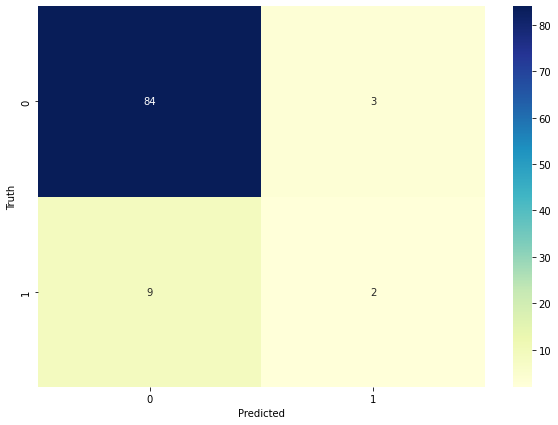

In [101]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d',cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')